# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# No need to install the libraries as it is already installed in the local anaconda system
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
loan = pd.read_csv("Loan_Modelling.csv")

In [4]:
# Copy the data for into another variable
data = loan.copy()

## Data Overview

* Observations
* Sanity checks

In [5]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [7]:
## Understand the shape of the dataset
data.shape

(5000, 14)

In [8]:
# checking datatypes and number of non-null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
# checking for missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [10]:
# checking the number of unique values in each column
data.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIPCode                467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
## Droping ID has no significance
data.drop(columns=["ID"], inplace=True)

In [12]:
# Let's look at the statistical summary of the data
data.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

**Observations**

- The Column Experience has some anomalies in the dataset as it has -ive values which needs to be corrected.
- The Mortgage seems to be right-skewed and there are Mortgage are low to mid income families
- The Age is evenly distributed from 23 years as min and 67 as max with mean 45 years

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [13]:
## Define the reusable analytics function to get inferance about the dataset
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.75, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

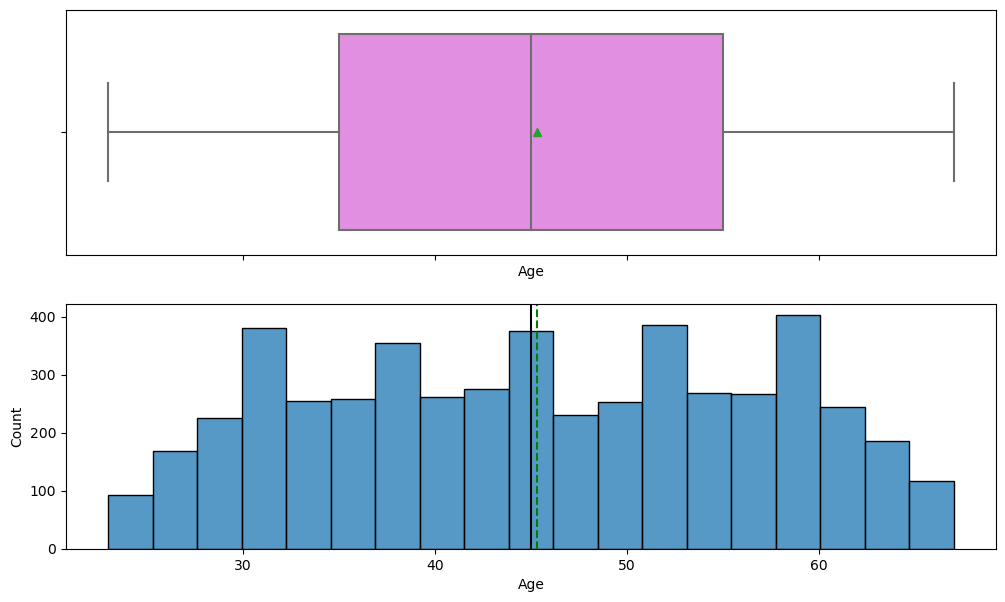

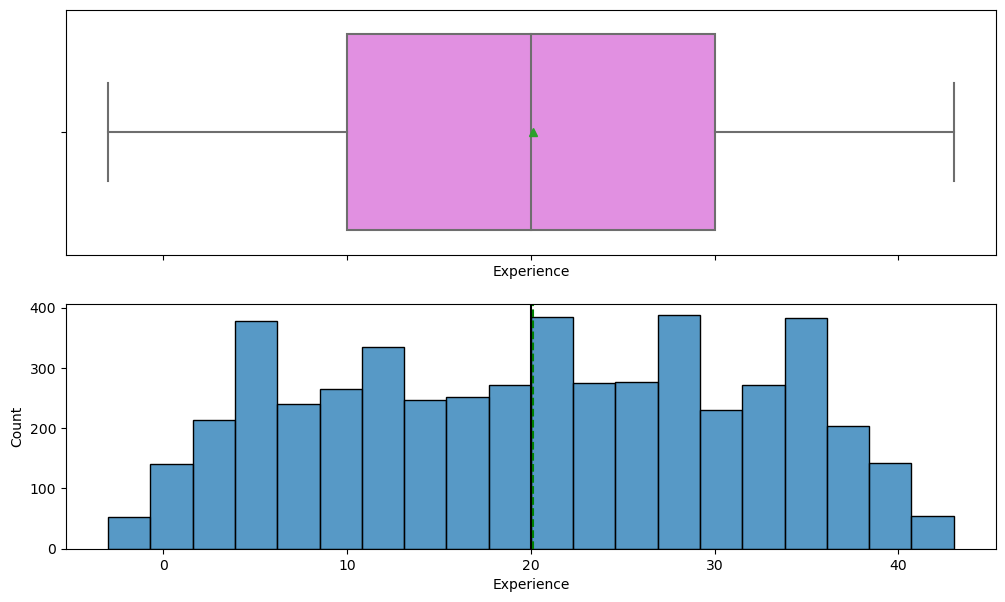

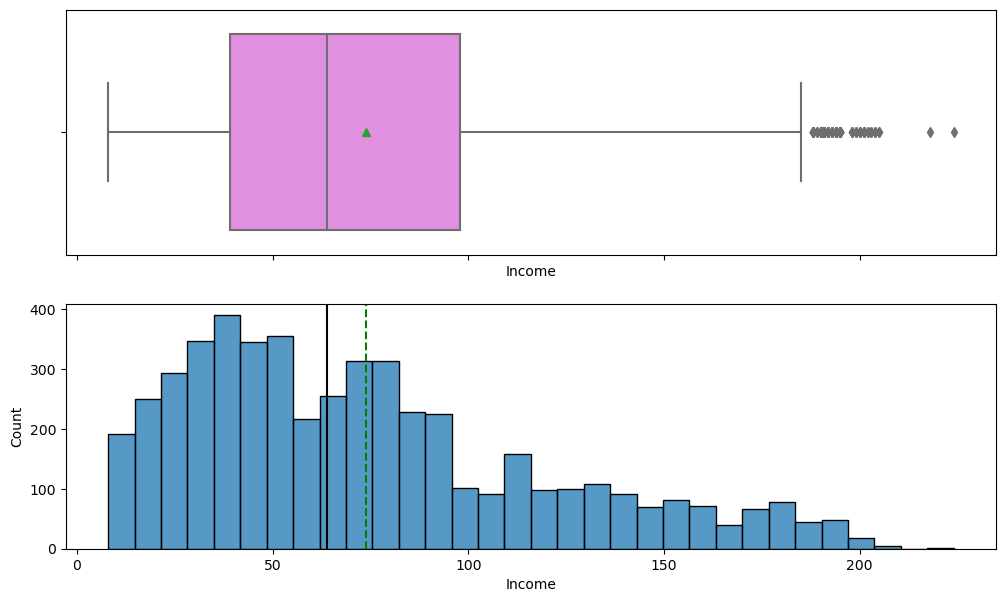

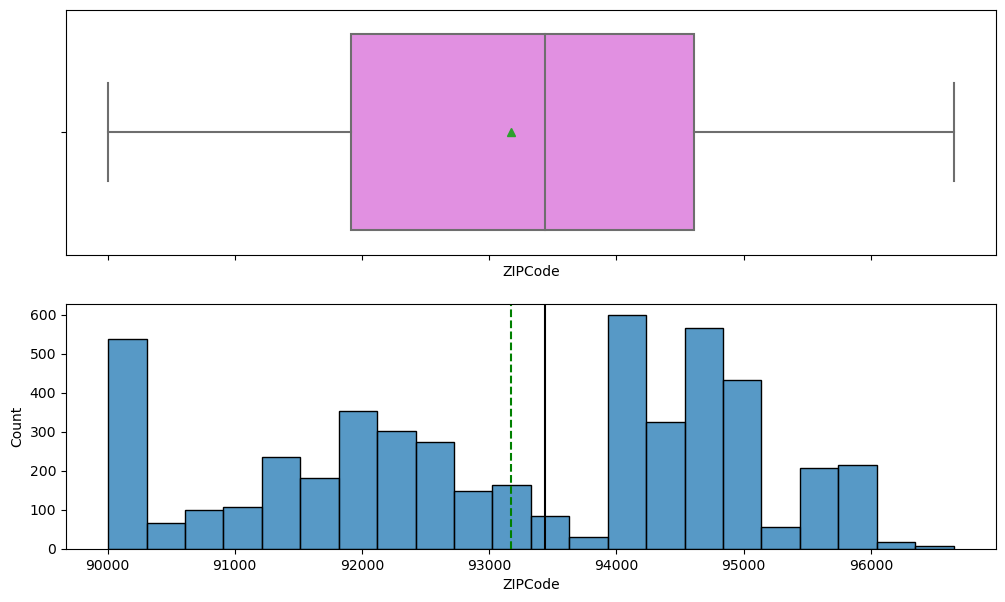

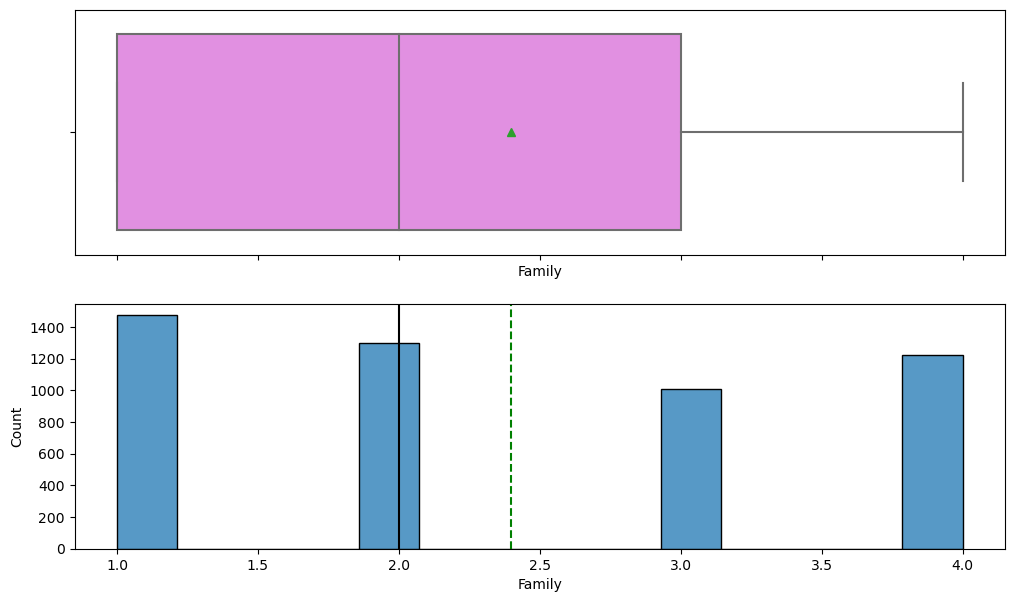

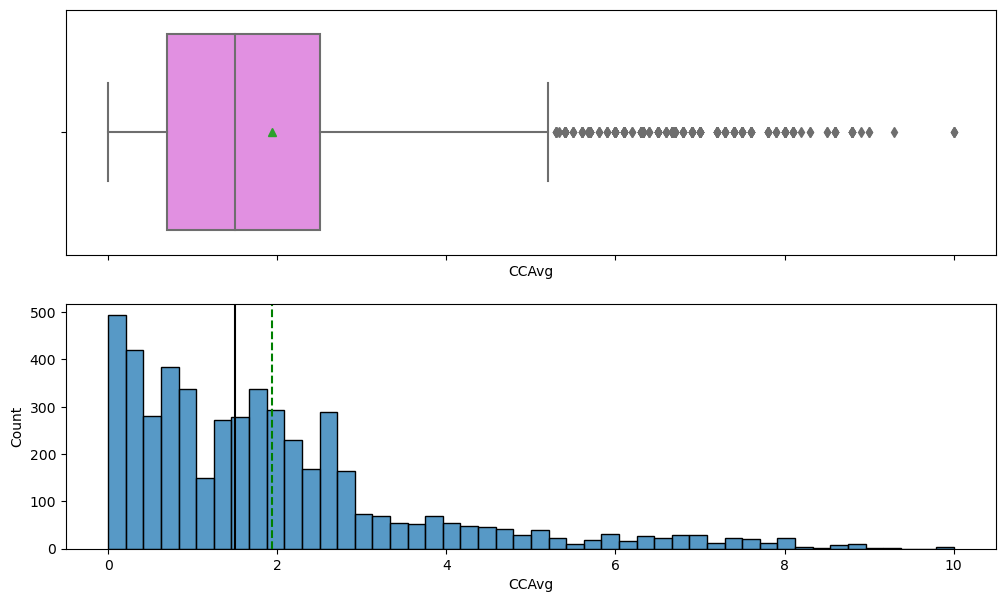

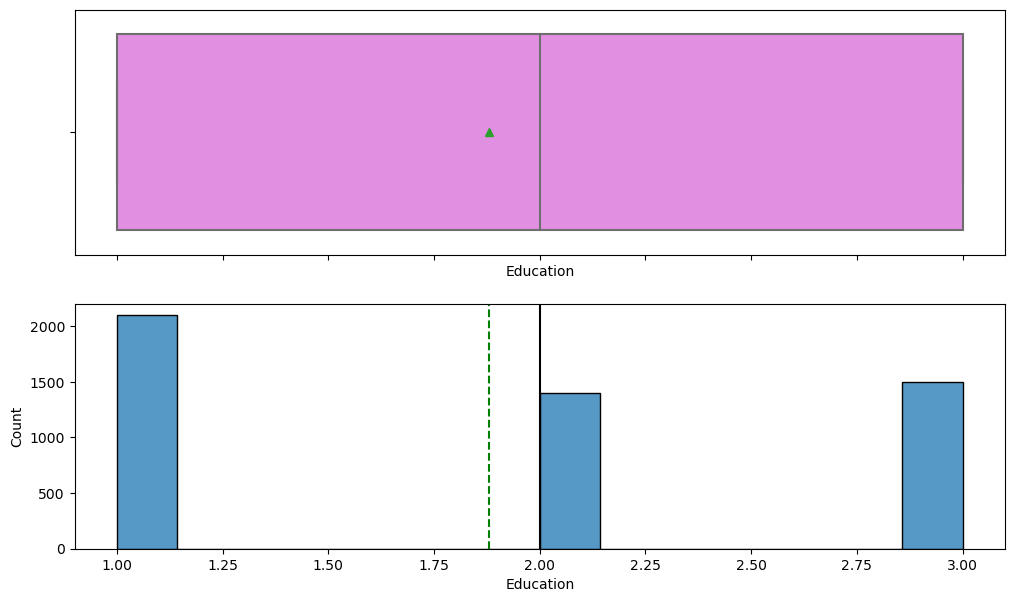

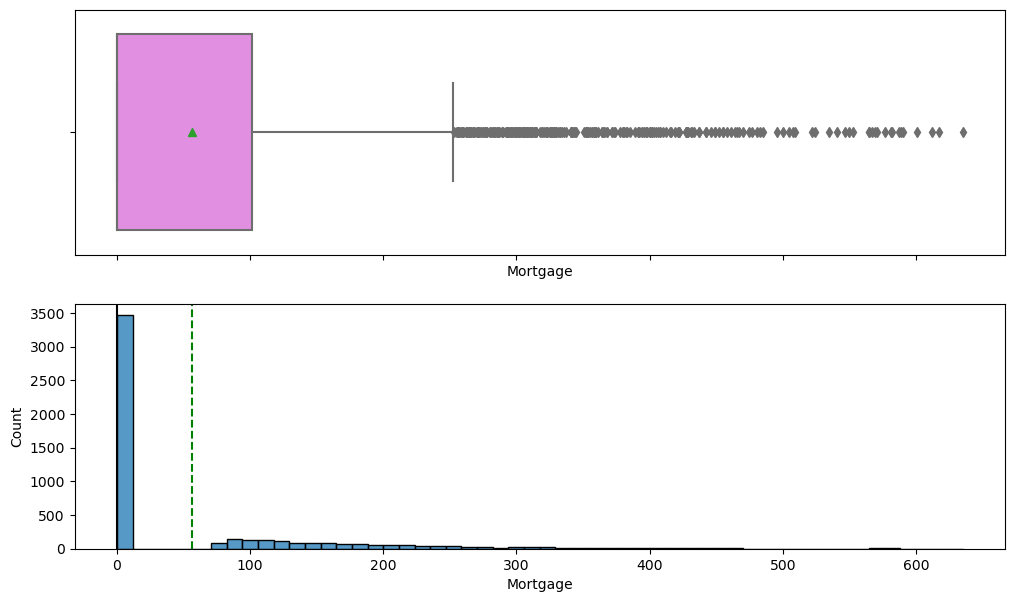

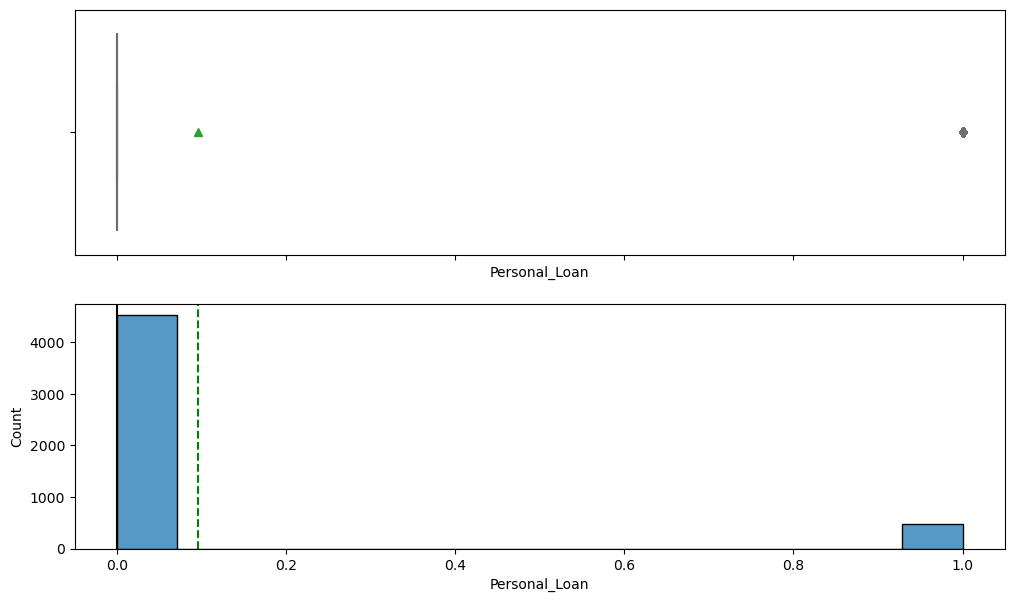

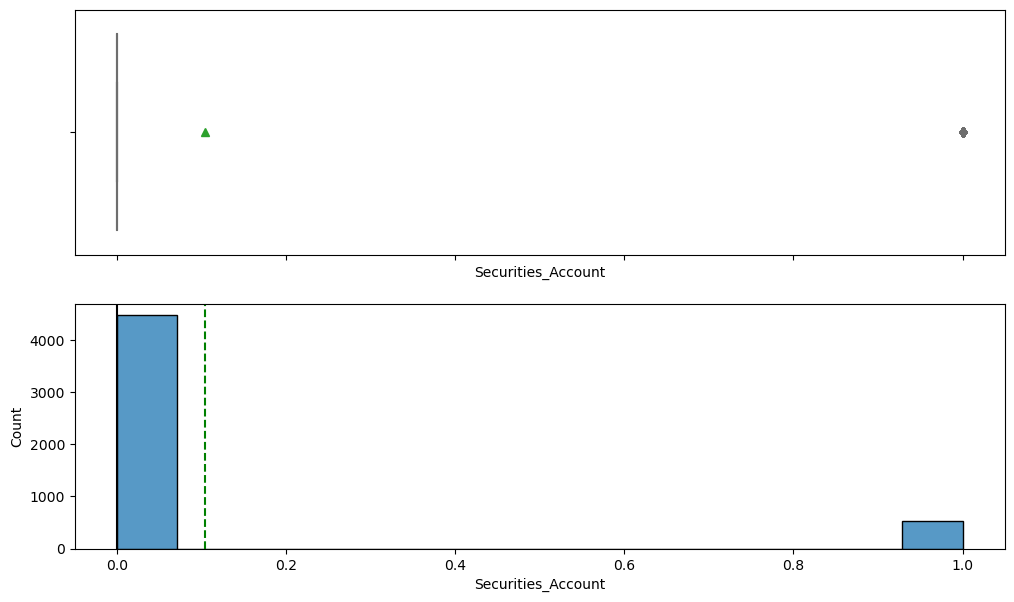

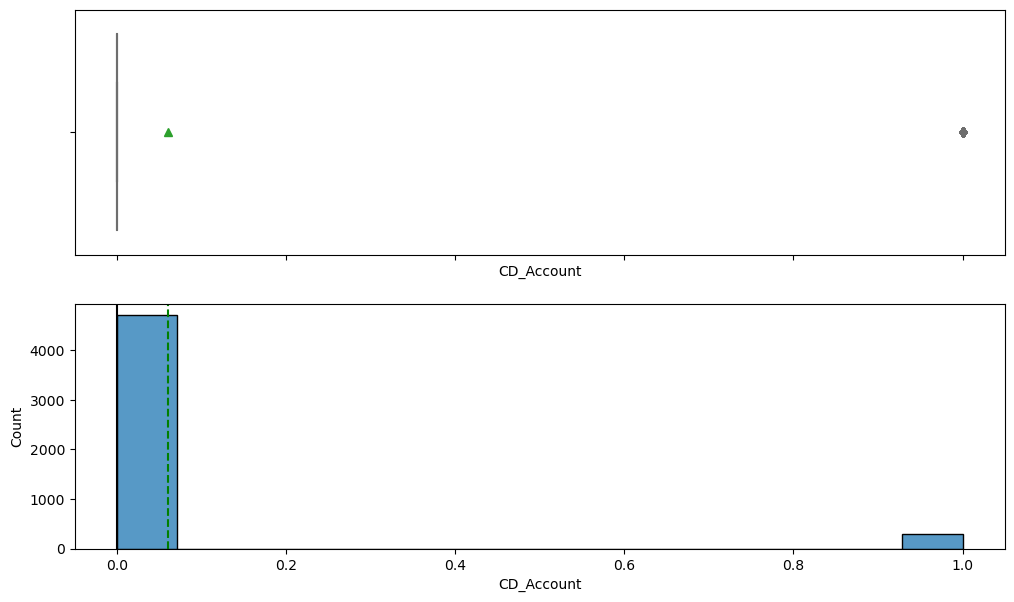

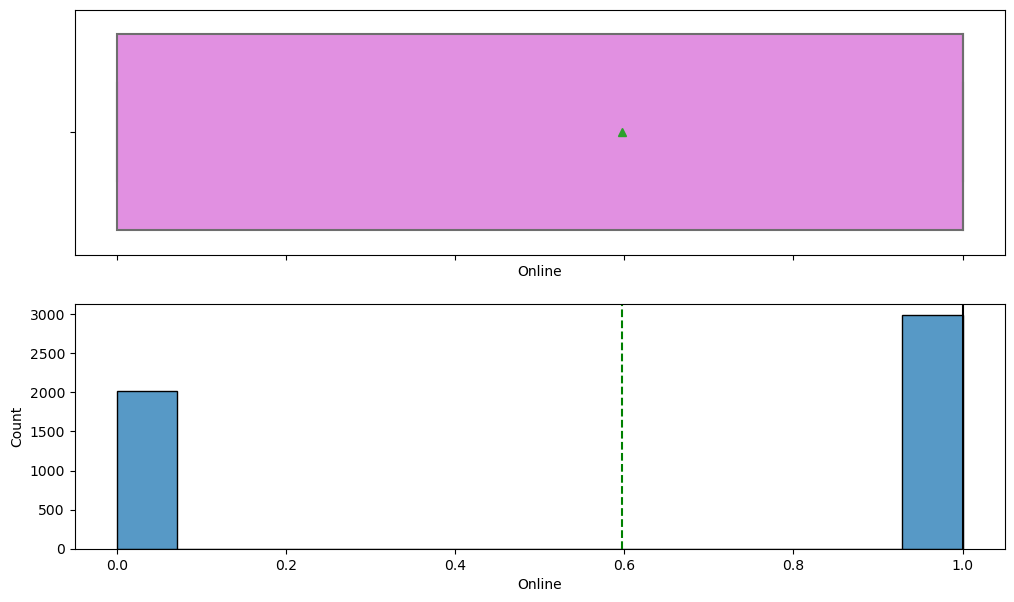

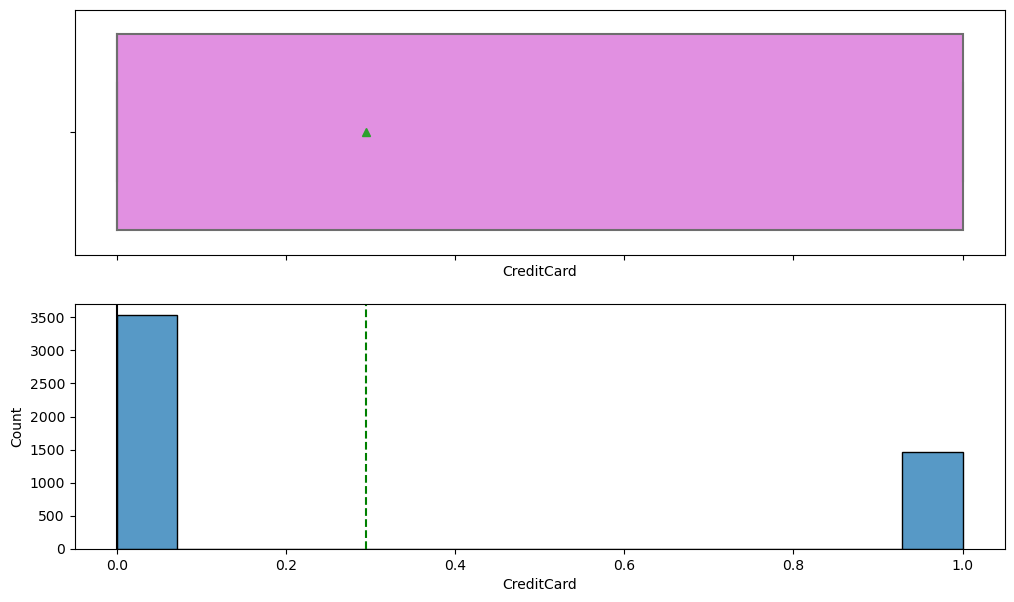

In [15]:
for col in data.columns:
    histogram_boxplot(loan, col)

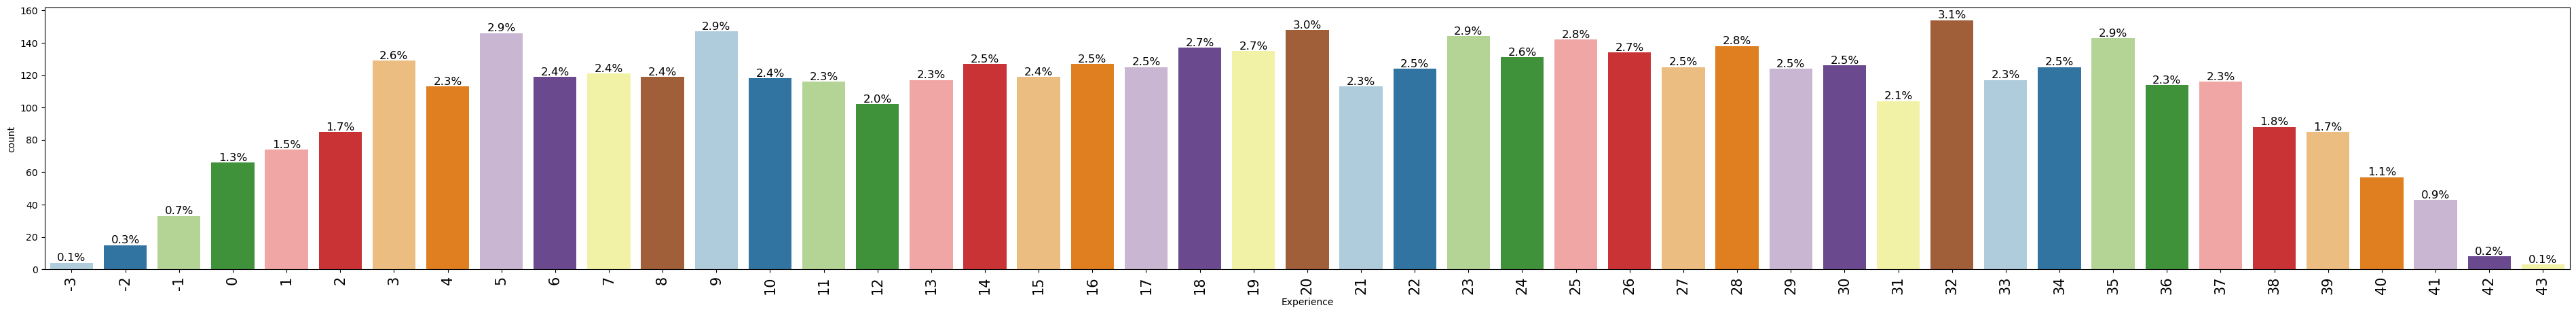

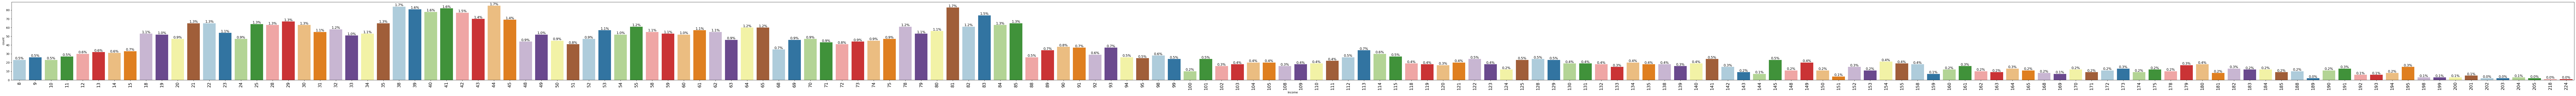

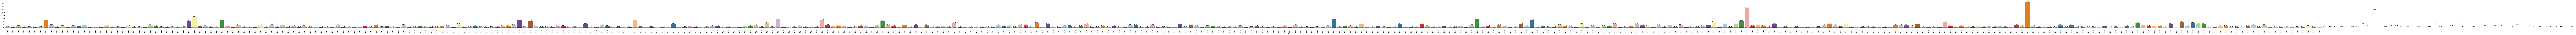

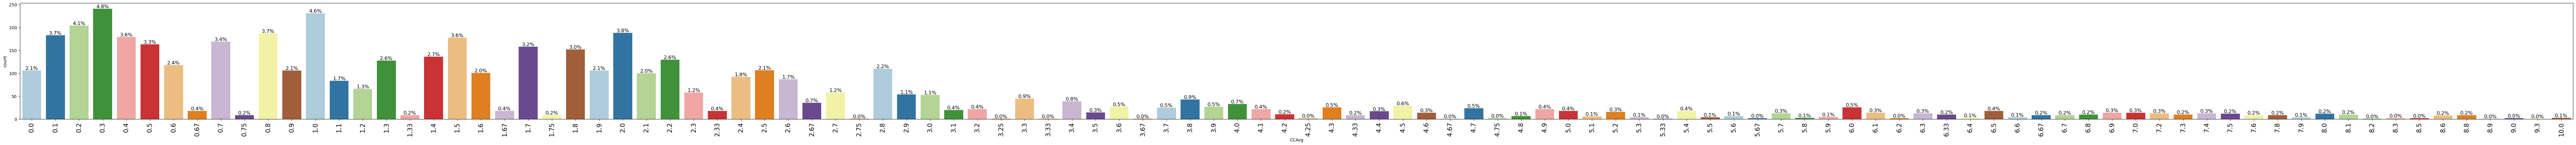

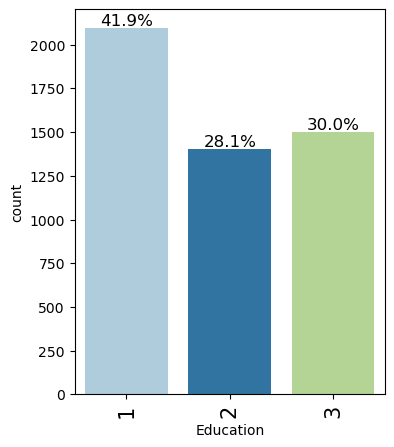

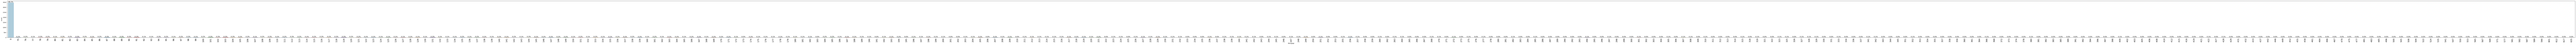

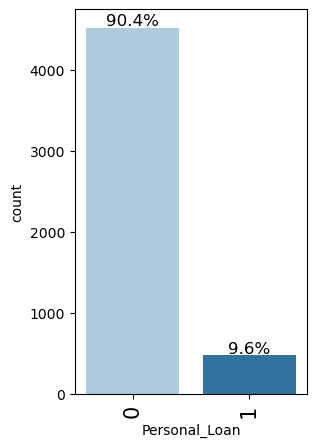

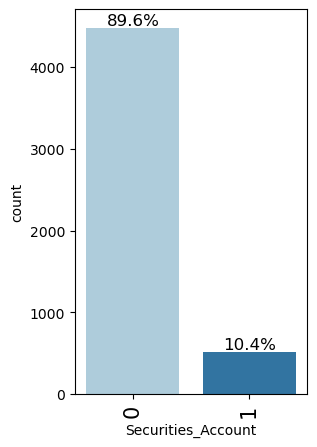

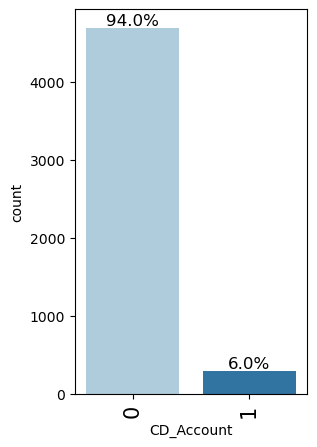

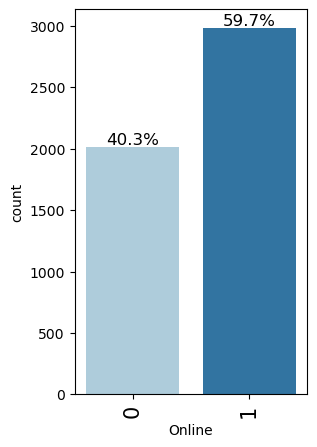

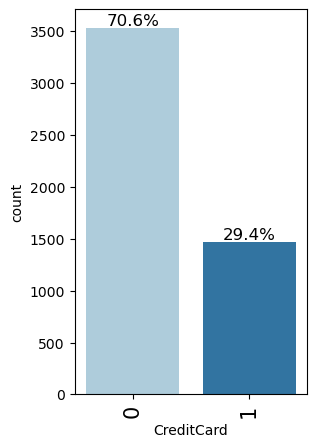

In [16]:
for col in data.columns.tolist()[1:]:
    labeled_barplot(data, col, perc=True)

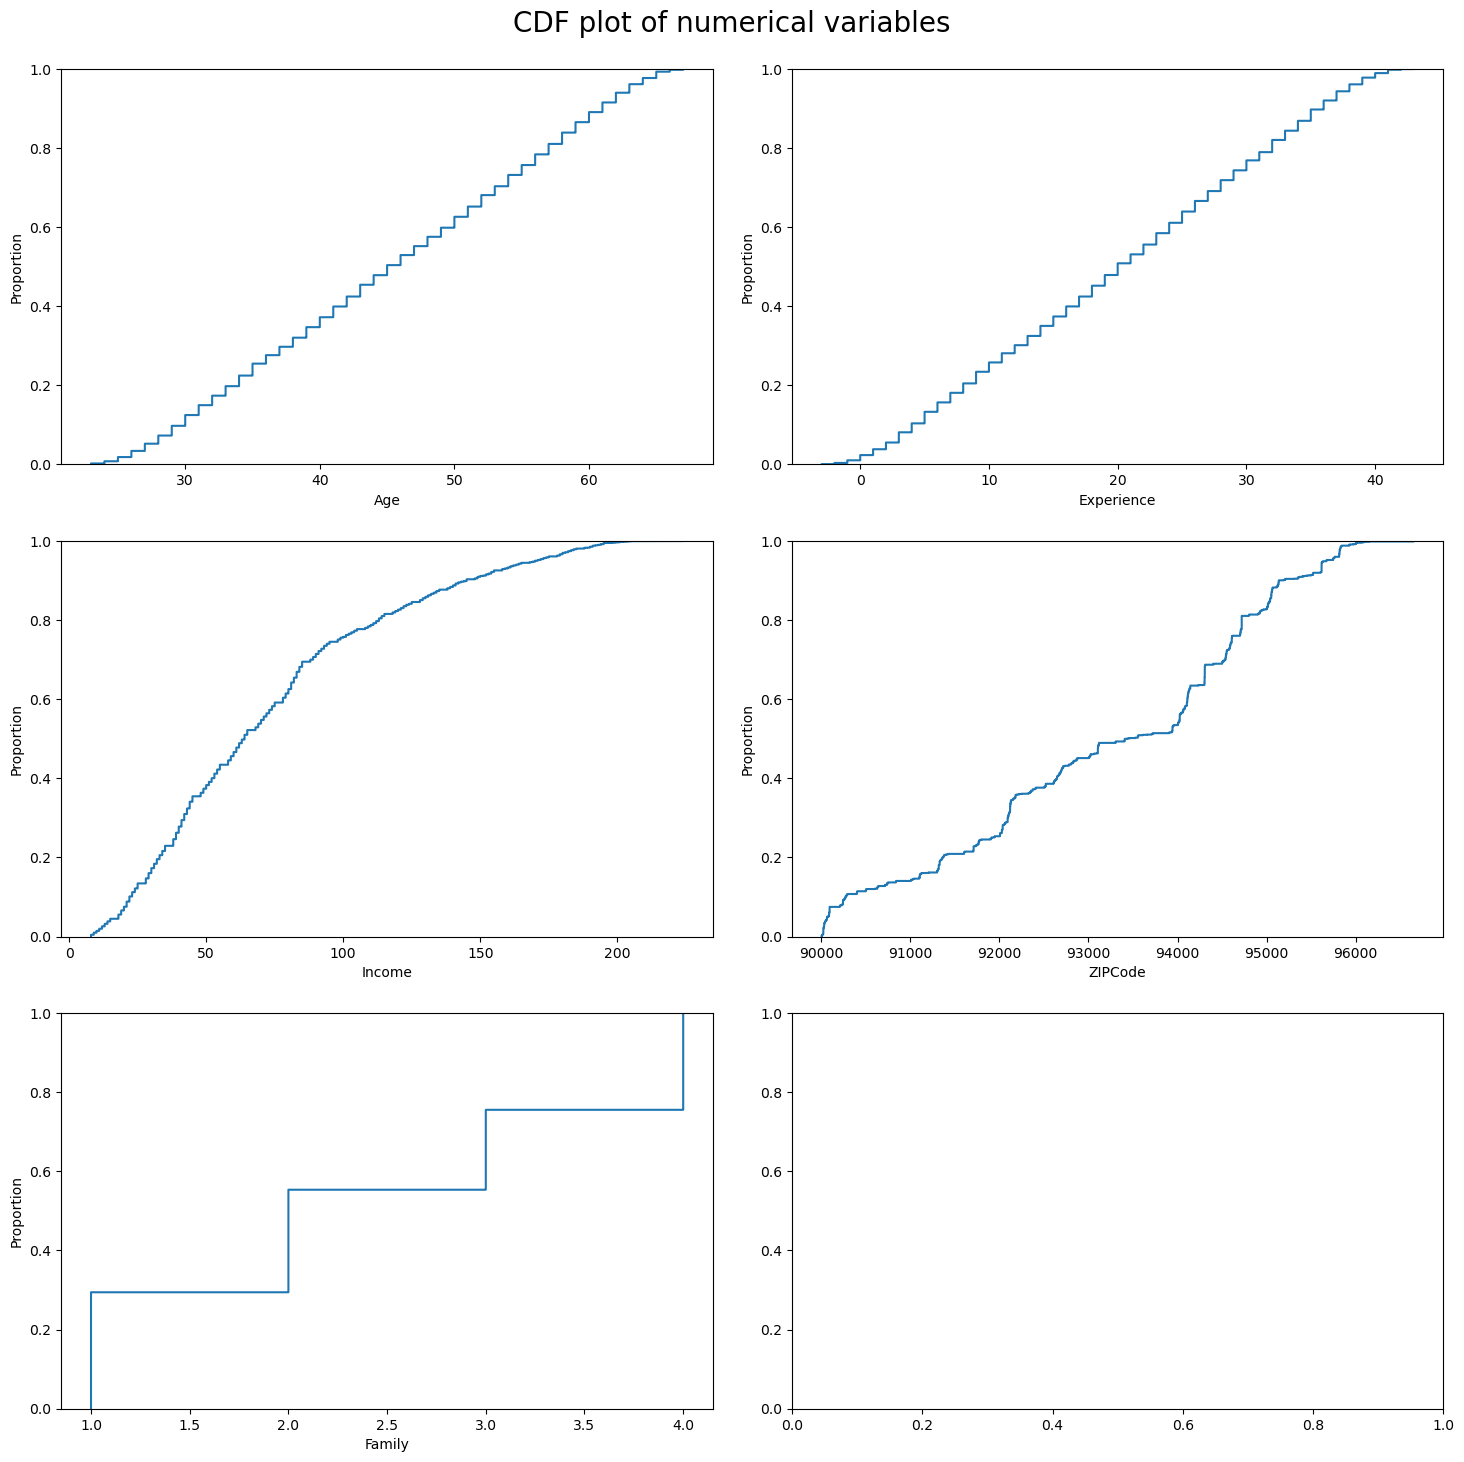

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=data, ax=axes[ii][0], x=data.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=data, ax=axes[ii][1], x=data.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

### Bivariate analysis

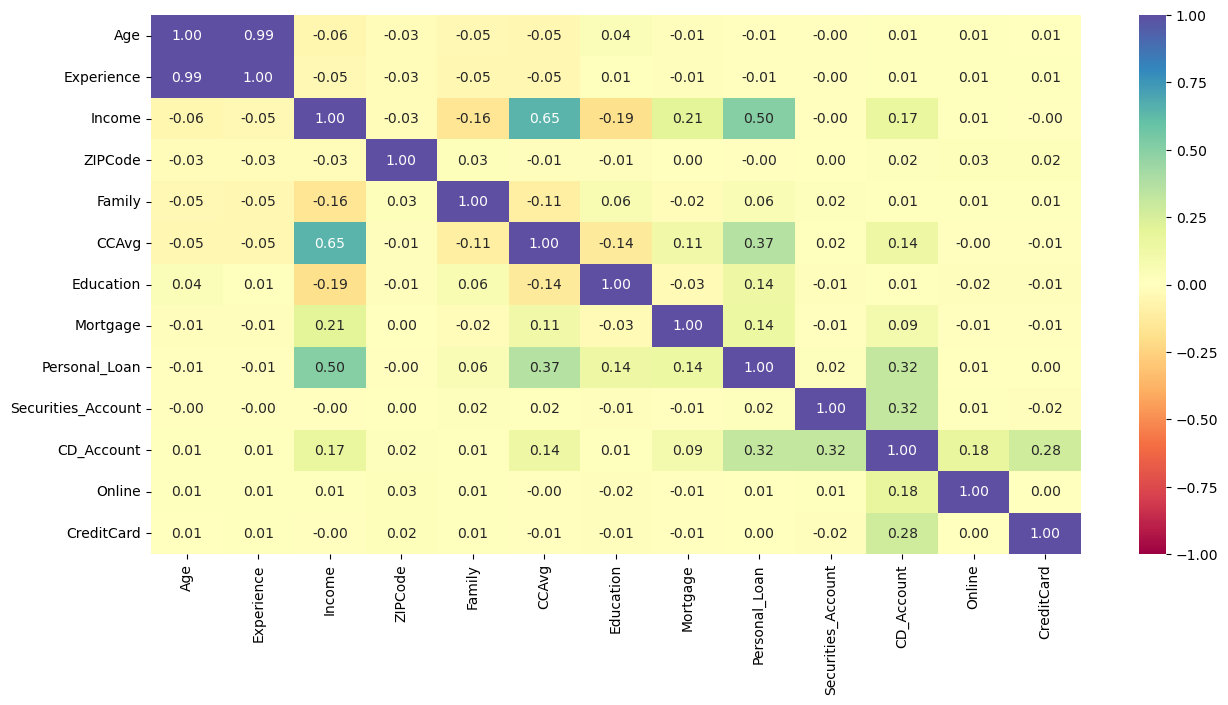

In [18]:
## Lets check the correlations
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Heat Map Observations**

- There is a high positive correlation between *Age* and *Experience*.
- There is a moderate to high positive correlation between *CC Average amout* and *Income*, indicating customers with customer with high income have high credit card payments.
- There is a moderate  positive correlation between *Personal Loan* and *Income*, indicating customers with customer with high income have personal loans.

In [19]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

**Observations**

- Similar results are seens here in pairplot for income and CC payment

In [20]:

sns.pairplot(
    data=data[
        [
            "Income",
            "CCAvg",
            "Personal_Loan",
            "Education",
        ]
    ],
    hue="Education",
)

plt.show()

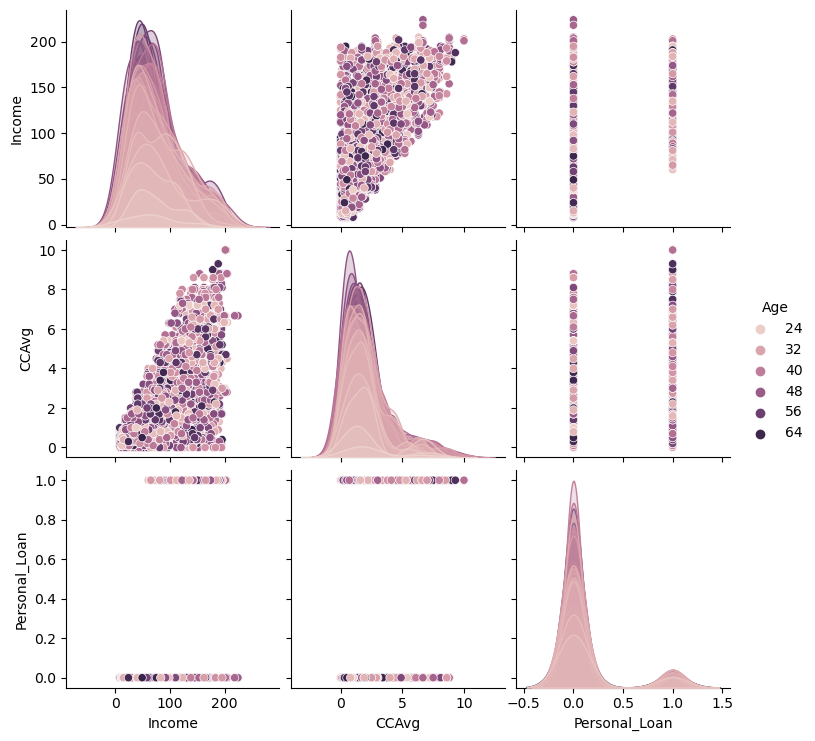

In [55]:
sns.pairplot(
    data=data[
        [
            "Income",
            "CCAvg",
            "Personal_Loan",
            "Age",
        ]
    ],
    hue="Age",
)

plt.show()

- As the income is increasing the CC payment is increasing which signifies there is a potential to take personal loans

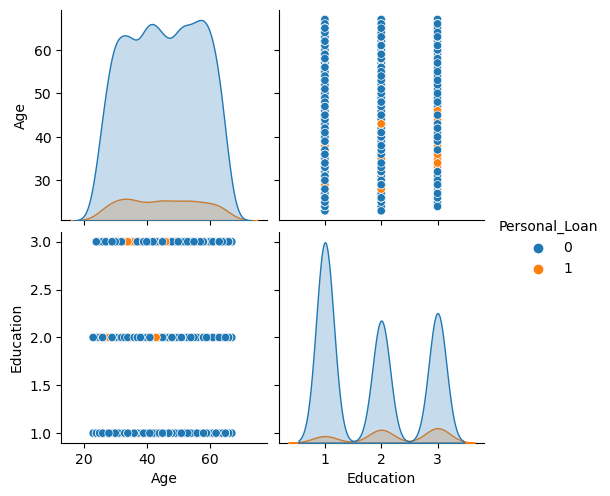

In [21]:
sns.pairplot(
    data=data[
        [
#             "Income",
#             "CCAvg",
            "Age",
            "Education",
            "Personal_Loan",
        ]
    ],
    hue="Personal_Loan",
)

plt.show()

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Let's check how a customer's interest in purchasing a loan varies with their education

In [24]:
stacked_barplot(data, "Education", "Personal_Loan")

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


#### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


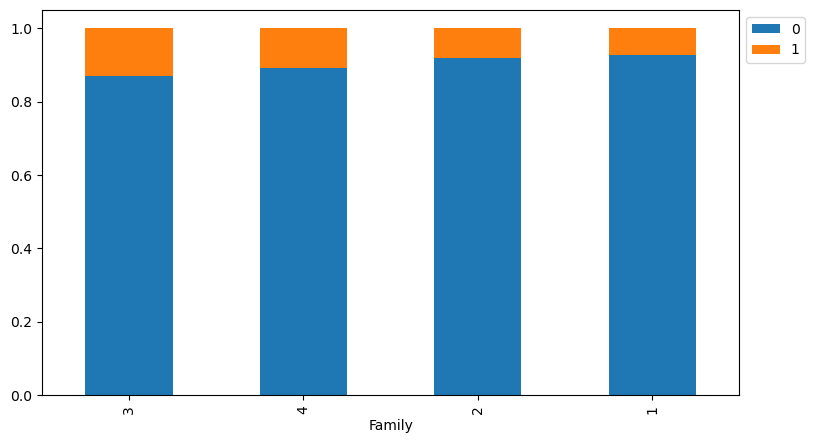

In [25]:
stacked_barplot(data, "Family", "Personal_Loan")

#### Let's check how a customer's interest in purchasing a loan varies with their age

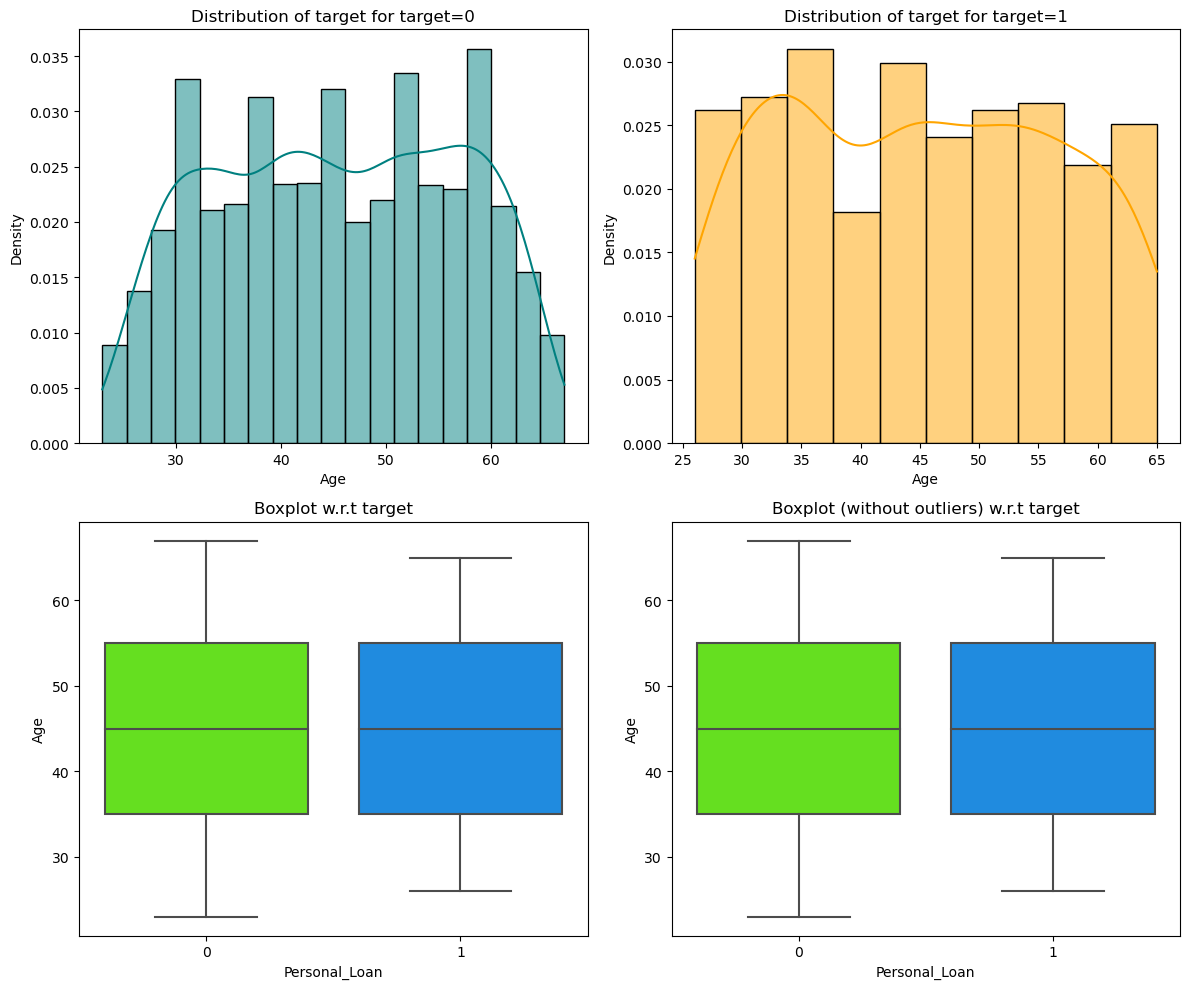

In [26]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

#### Personal Loan vs Income

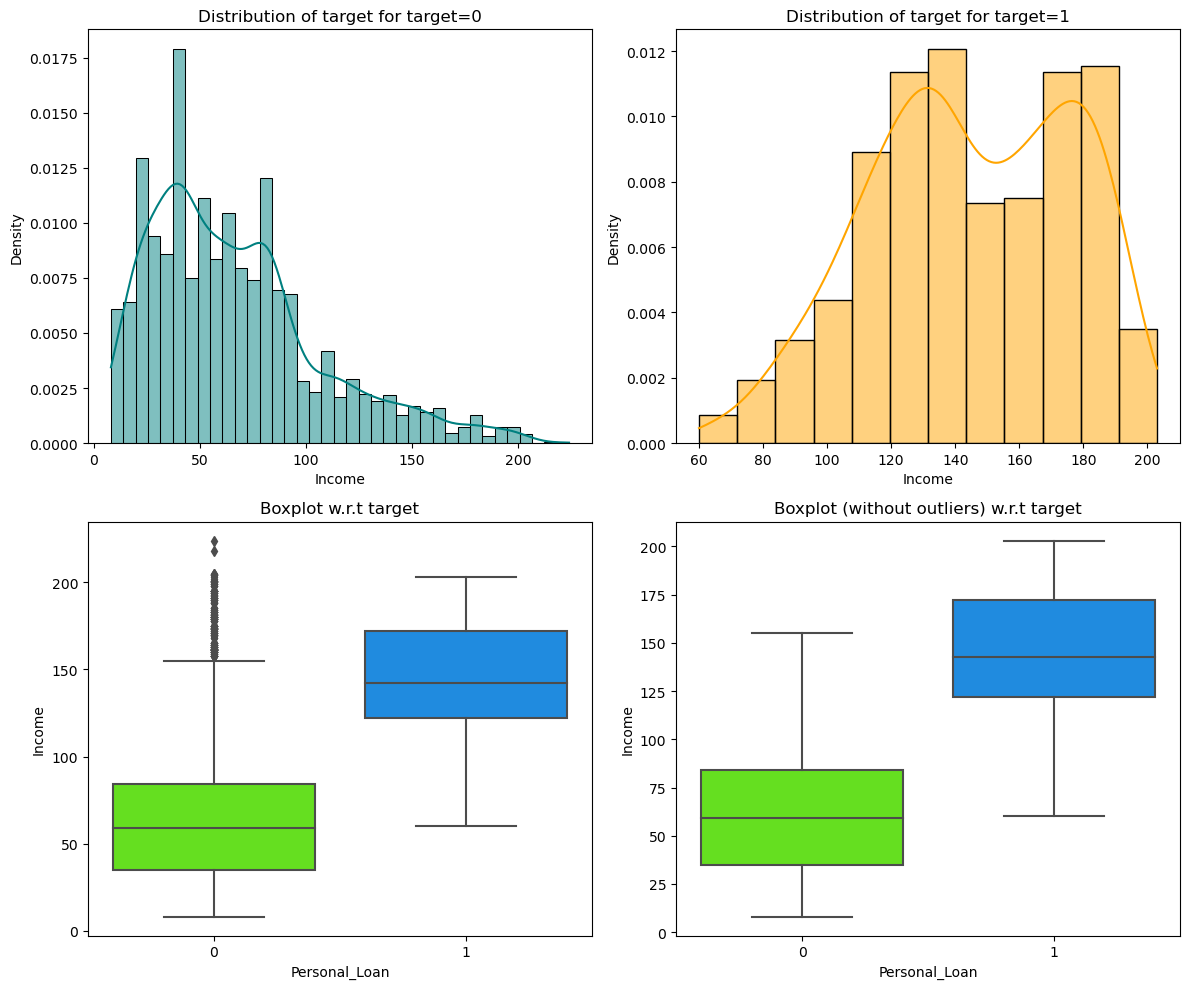

In [27]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

#### Personal Loan vs CCAvg

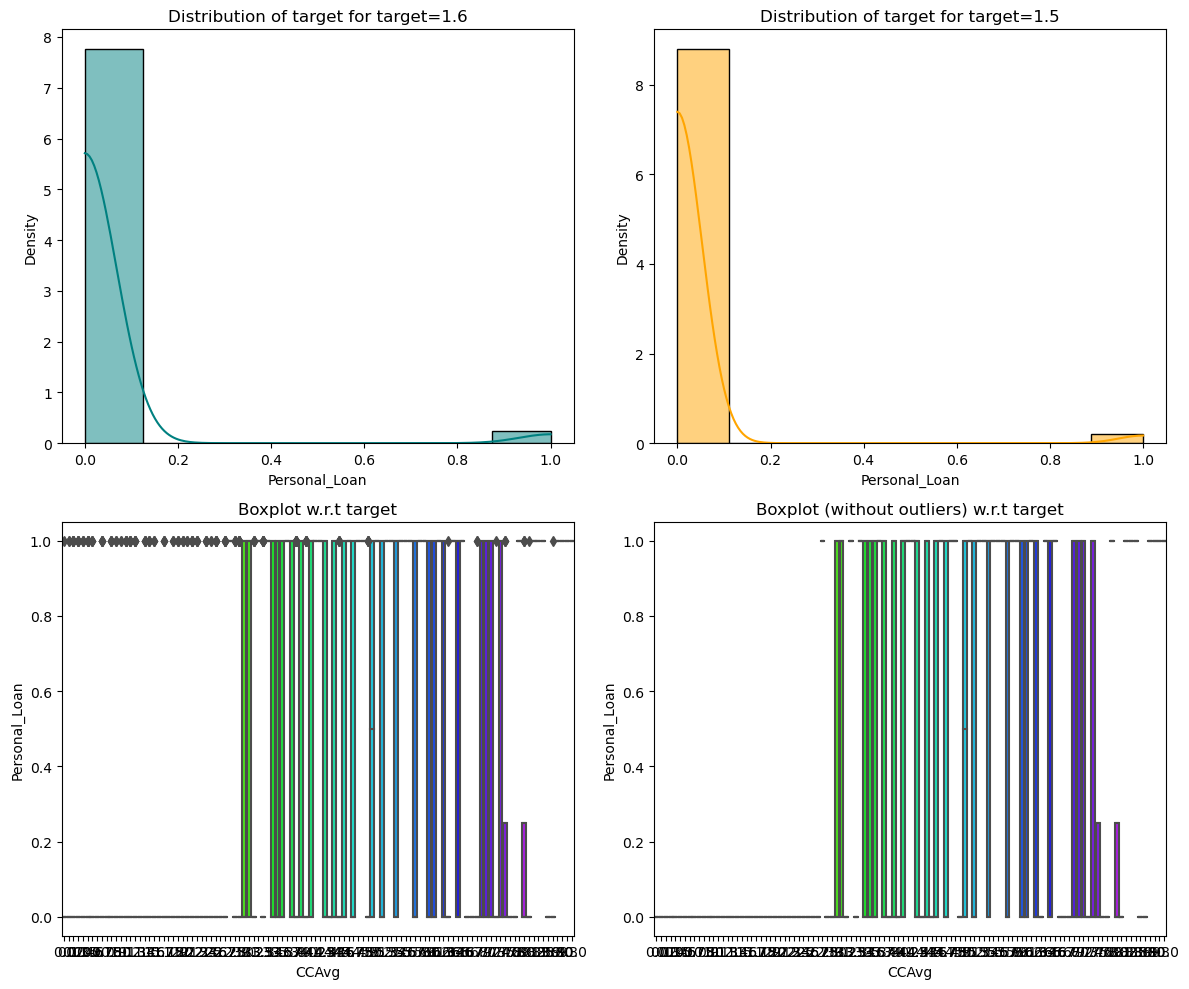

In [28]:
distribution_plot_wrt_target(data, "Personal_Loan", "CCAvg")

In [29]:
## Find out the customer who have credit cards
cc_row_df = data.query('CCAvg > 0')
cc_row_df['CCAvg'].size

4894

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
- The Mortgage seems to be right-skewed and there are no Mortgage are low to mid income families
2. How many customers have credit cards?
- 4894 of the customers have credit cards
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
- Income have a strong correlation with personal loan
4. How does a customer's interest in purchasing a loan vary with their age?
- Personal loans are pruchased for customer age < 30 
5. How does a customer's interest in purchasing a loan vary with their education?
- Purchasing of loan increases for Advanced/Professional than Graduate than Undergrad

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [30]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [31]:
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [32]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [33]:
data["Education"].unique()

array([1, 2, 3])

### Outlier Detection

In [34]:
threshold = 3
outlier = {}
for col in data.columns:
    i = data[col]
    mean = np.mean(data[col])
    std = np.std(data[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Age : []

 Experience : []

 Income : [218, 224]

 ZIPCode : []

 Family : []

 CCAvg : [7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.2, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.3, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.4, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.6, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.8, 7.9, 7.9, 7.9, 7.9, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.2, 8.3, 8.3, 8.5, 8.5, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.8, 8.9, 9.0, 9.0, 9.3, 10.0, 10.0, 10.0]

 Education : []

 Mortgage : [364, 364, 366, 366, 366, 368, 368, 372, 372, 373, 374, 378, 380, 380, 380, 381, 382, 383, 385, 389, 391, 392, 392, 394, 394, 396, 397, 397, 398, 400, 400, 400, 402, 402, 403, 405, 406, 408, 408, 410, 412, 415, 416, 419, 421, 4

In [35]:
Q1 = data.quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [36]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Age                    0.00
Experience             0.00
Income                 1.92
ZIPCode                0.00
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

### Feature Engineering

In [37]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [38]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]
data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [39]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Model Building

### Model Data Preparation

In [41]:
# dropping Experience as it is perfectly correlated with Age
data_mod = data.copy()
X = data_mod.drop(["Personal_Loan", "Experience"], axis=1)
Y = data_mod["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [42]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


### Model Evaluation Criterion

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.


### Model Building

In [44]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [45]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [73]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

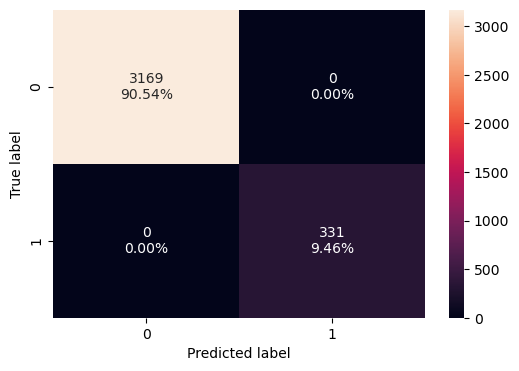

In [47]:
confusion_matrix_sklearn(model, X_train, y_train)

In [48]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

#### Visualizing the Decision Tree

In [49]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


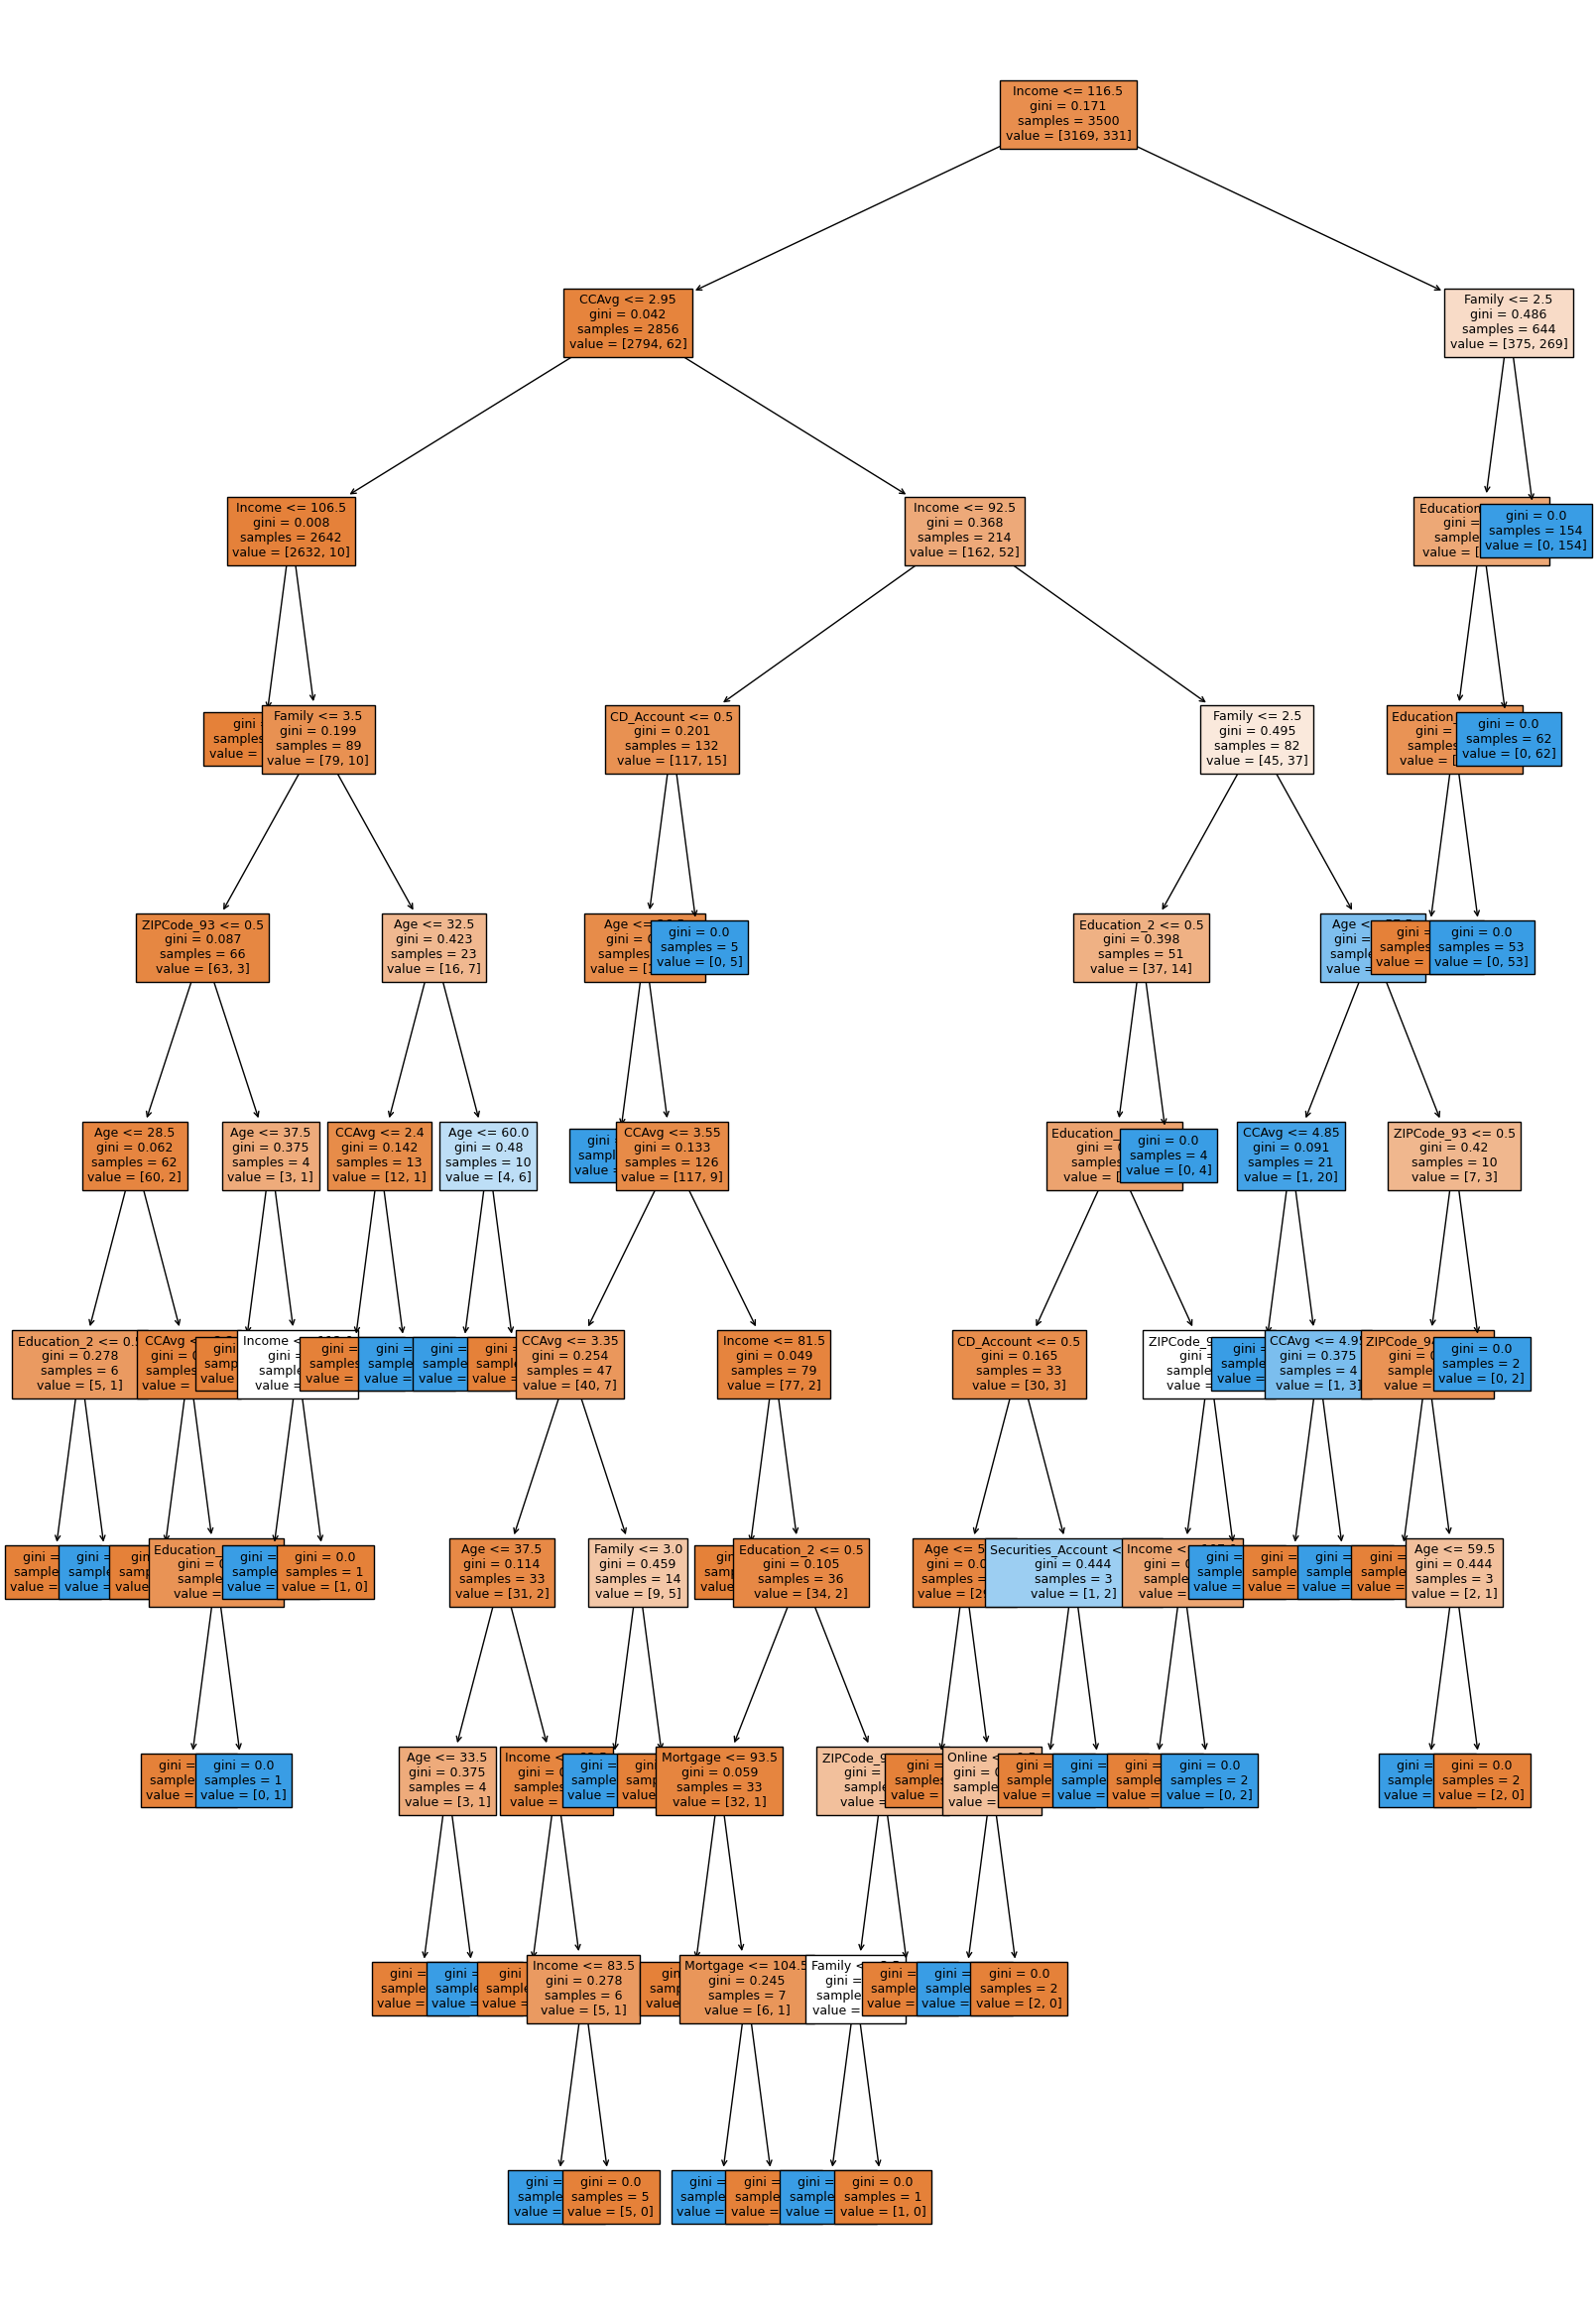

In [50]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [51]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [52]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


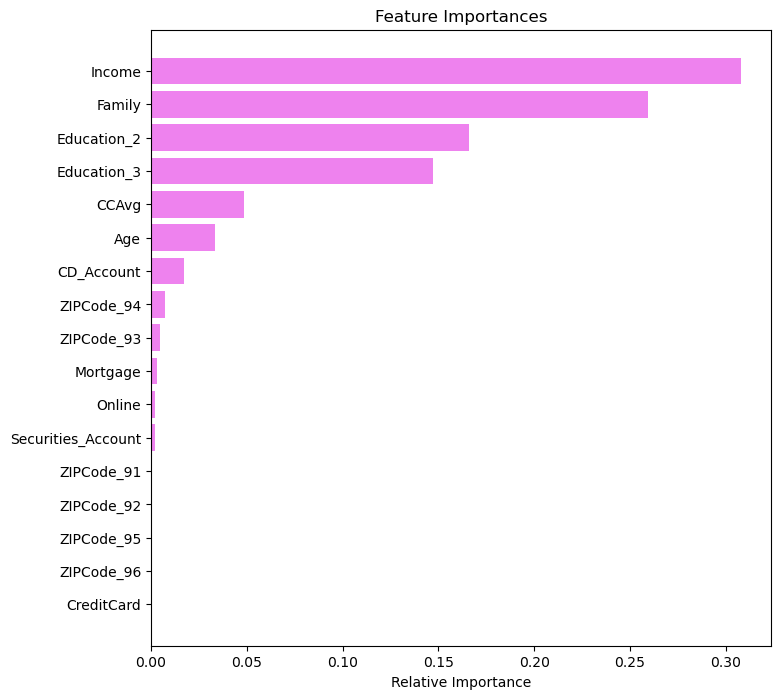

In [53]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on test data

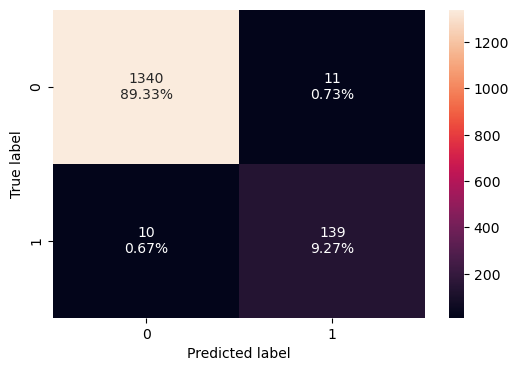

In [54]:
confusion_matrix_sklearn(model,X_test,y_test) 

In [55]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0     0.986  0.932886   0.926667  0.929766

### Model Performance Improvement

#### Pre-Pruning

In [75]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

In [76]:
# Output the best parameters and best score for verification
print("Best parameters found: ", grid_obj.best_params_)
print("Best cross-validation recall score: ", grid_obj.best_score_)

Best parameters found:  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}
Best cross-validation recall score:  0.876164631388512


In [77]:
## Optional optimized code for reuability.
def tune_decision_tree(X_train, y_train):
    # Initialize the DecisionTreeClassifier
    estimator = DecisionTreeClassifier(random_state=1)

    # Grid of parameters to choose from
    parameters = {
        "max_depth": np.arange(6, 15),
        "min_samples_leaf": [1, 2, 5, 7, 10],
        "max_leaf_nodes": [2, 3, 5, 10],
    }

    # Type of scoring used to compare parameter combinations
    acc_scorer = make_scorer(recall_score)

    # Run the grid search with 5-fold cross-validation
    grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
    grid_obj.fit(X_train, y_train)

    # Extract the best estimator
    best_estimator = grid_obj.best_estimator_

    # Output the best parameters and best score for verification
    print("Best parameters found: ", grid_obj.best_params_)
    print("Best cross-validation recall score: ", grid_obj.best_score_)
    
    return best_estimator

def fit_best_estimator(estimator, X_train, y_train):
    # Fit the best estimator to the training data
    estimator.fit(X_train, y_train)
    return estimator

# Usage
best_estimator = tune_decision_tree(X_train, y_train)
best_estimator = fit_best_estimator(best_estimator, X_train, y_train)

Best parameters found:  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 10}
Best cross-validation recall score:  0.876164631388512


#### Checking performance on training data

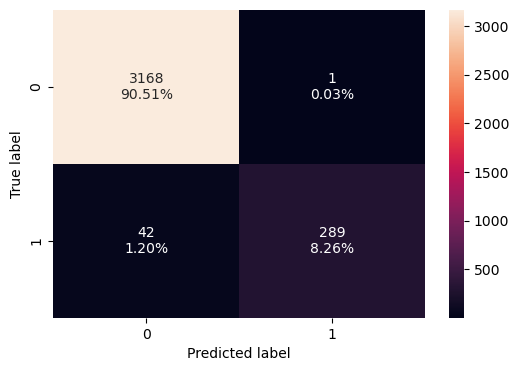

In [58]:
confusion_matrix_sklearn(estimator,X_train,y_train)

In [59]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator,X_train,y_train) 
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.987714  0.873112   0.996552  0.930757

**Visualizing the Decision Tree**

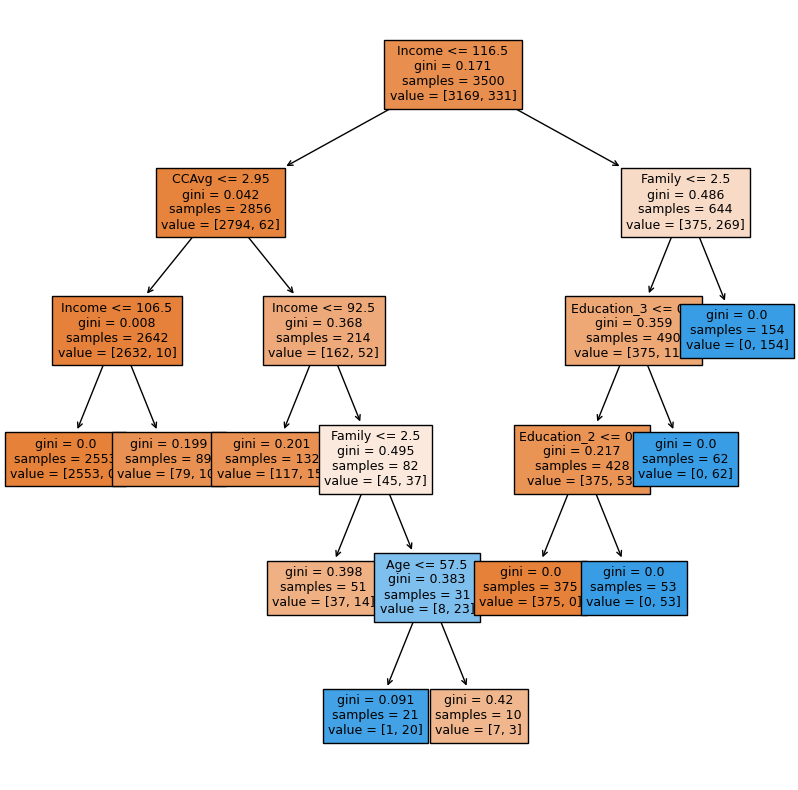

In [60]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [61]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [62]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


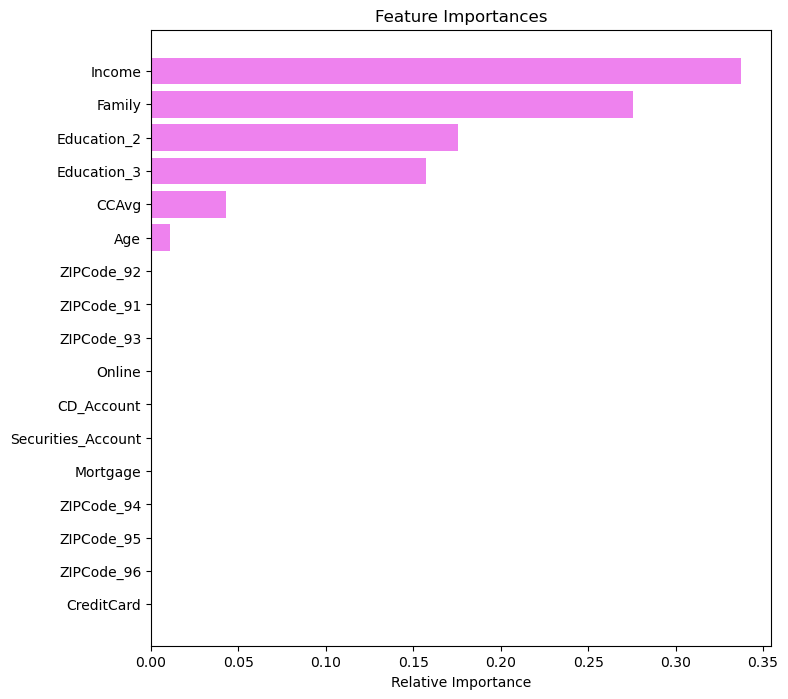

In [63]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

In [64]:
confusion_matrix_sklearn(estimator,X_test,y_test) 

In [65]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator,X_test,y_test)
decision_tree_tune_post_test

Accuracy    Recall  Precision        F1
0  0.978667  0.785235        1.0  0.879699

## Model Comparison and Final Model Selection

In [67]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)
Accuracy                     1.0                     0.987714
Recall                       1.0                     0.873112
Precision                    1.0                     0.996552
F1                           1.0                     0.930757

In [70]:
models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_post_test.T], 
    axis=1
)
models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)
Accuracy                0.986000                     0.978667
Recall                  0.932886                     0.785235
Precision               0.926667                     1.000000
F1                      0.929766                     0.879699

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

**Below observation will help to predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.**

- Overall we can see that the Decision Tree (Pre-Pruning) performs better on the dataset
- Looking at the important variables based on the Features importance in decision trees
- Below are **important features** based on various analyis and feature optimization/performance
    - **Income**
    - **CCAvg**
    - **Family**
    - **Eduction**
    - **Age**
- Bank should leverage above features to target Customer via campaign management and have higher propensity to get look for personal loans
- IT Team to discuss with Business to provide more data to optimize further more dataset and accuracy and reduce the recalls further 
- Develop a Application with above the model to predict the which customer have high propensity / probability to get conveted.



___